In [1]:
from pyquil.quil import Program
import pyquil.api as api
from pyquil.gates import *
qvm = api.QVMConnection()
from pyquil.api import get_qc


In [2]:
def small_ansatz(x):
    return Program(X(0),RX(1.57,0),H(2),CNOT(0,2),RZ(x[0],2),CNOT(0,2),RX(-1.57,0),H(2),)

In [3]:
print(small_ansatz([1]))

X 0
RX(1.57) 0
H 2
CNOT 0 2
RZ(1) 2
CNOT 0 2
RX(-1.57) 0
H 2



In [4]:
import numpy as np
from openfermion.transforms import get_sparse_operator
from openfermion.utils import pauli_exp_to_qasm
from openfermion.ops import QubitOperator
from openfermion.transforms import get_fermion_operator, jordan_wigner, bravyi_kitaev
from pyscf import ci
from pyscf import mp
from openfermionpyscf import run_pyscf
from openfermion.hamiltonians import MolecularData
import os

from numpy import array, concatenate, zeros
from numpy.random import randn
from scipy.optimize import minimize

from openfermion.config import *

from openfermion.hamiltonians import MolecularData
from openfermion.transforms import jordan_wigner
from openfermion.utils import uccsd_singlet_paramsize

In [5]:
geometry = [["H", [0, 0, 0]],
            ["H", [0, 0, 0.7414]]]
basis = "sto-3g"
multiplicity = 1
charge = 0
molecule = MolecularData(geometry, basis, multiplicity, charge)
h2_molecule = run_pyscf(molecule, run_mp2=True, run_cisd=True, run_ccsd=True, run_fci=True)
print(molecule.ccsd_energy)

-1.1372703406409188


In [6]:
import openfermionpyscf as ofpyscf
from openfermion.ops import QubitOperator
from forestopenfermion import pyquilpauli_to_qubitop, qubitop_to_pyquilpauli
hamiltonian = ofpyscf.generate_molecular_hamiltonian(
    geometry, basis, multiplicity, charge)
qubit_operator=bravyi_kitaev(get_fermion_operator(hamiltonian))
hamiltonian1=qubitop_to_pyquilpauli(qubit_operator)
#print(qubit_operator)
print(hamiltonian1)

(-0.09886396933545721+0j)*I + (0.17119774903432944+0j)*Z0 + (0.17119774903432936+0j)*Z0*Z1 + (-0.22278593040418498+0j)*Z2 + (-0.22278593040418496+0j)*Z1*Z2*Z3 + (0.16862219158920938+0j)*Z1 + (0.04532220205287401+0j)*Y0*Z1*Y2*Z3 + (0.04532220205287401+0j)*X0*Z1*X2 + (0.04532220205287401+0j)*X0*Z1*X2*Z3 + (0.04532220205287401+0j)*Y0*Z1*Y2 + (0.120544822053018+0j)*Z0*Z2 + (0.165867024105892+0j)*Z0*Z1*Z2*Z3 + (0.165867024105892+0j)*Z0*Z1*Z2 + (0.120544822053018+0j)*Z0*Z2*Z3 + (0.17434844185575687+0j)*Z1*Z3


In [102]:
from grove.pyvqe.vqe import VQE
from scipy.optimize import minimize
import numpy as np

vqe_inst = VQE(minimizer=minimize,minimizer_kwargs={'method': 'nelder-mead'})


In [2]:
o= [array([0.00075]), array([0.00175]), array([0.00375]), array([0.00775]), array([0.01575]), array([0.03175]), array([0.06375]), array([0.12775]), array([0.25575]), array([0.25575]), array([0.22375]), array([0.22375]), array([0.22375]), array([0.22775]), array([0.22575]), array([0.22575]), array([0.22625]), array([0.22625]), array([0.226125]), array([0.226125])]

NameError: name 'array' is not defined

In [175]:
p=np.array(o)
print(p.shape)

(20, 1)


In [114]:
v=[-1.1168201320197901, -1.1170004356622518, -1.1173586779171958, -1.1180656973083372, -1.1194418362877858, -1.122042211031527, -1.126633085971527, -1.1333599823132, -1.136915641532299, -1.1367921853353464, -1.1372678562076481, -1.137195231891083, -1.137257417208499, -1.1372691051172328, -1.137270097768333, -1.1372700057193117, -1.137270152812978, -1.1372701505579457, -1.1372701580022844, -1.137270156986837]

In [103]:
angle=[0]

In [111]:
x = vqe_inst.vqe_run(small_ansatz, hamiltonian1, angle, None, qvm=qvm,disp=print,return_all=True)
print(x)

                     models will be ineffective
	Parameters: [0.00075] 
	E => -1.1168201320197901
	Parameters: [0.00175] 
	E => -1.1170004356622518
	Parameters: [0.00375] 
	E => -1.1173586779171958
	Parameters: [0.00775] 
	E => -1.1180656973083372
	Parameters: [0.01575] 
	E => -1.1194418362877858
	Parameters: [0.03175] 
	E => -1.122042211031527
	Parameters: [0.06375] 
	E => -1.126633085971527
	Parameters: [0.12775] 
	E => -1.1333599823132
	Parameters: [0.25575] 
	E => -1.136915641532299
	Parameters: [0.25575] 
	E => -1.1367921853353464
	Parameters: [0.22375] 
	E => -1.1372678562076481
	Parameters: [0.22375] 
	E => -1.137195231891083
	Parameters: [0.22375] 
	E => -1.137257417208499
	Parameters: [0.22775] 
	E => -1.1372691051172328
	Parameters: [0.22575] 
	E => -1.137270097768333
	Parameters: [0.22575] 
	E => -1.1372700057193117
	Parameters: [0.22625] 
	E => -1.137270152812978
	Parameters: [0.22625] 
	E => -1.1372701505579457
	Parameters: [0.226125] 
	E => -1.1372701580022844
	Parameters

In [153]:
import numpy as np

thetas = np.linspace(-0.5,0.5,100)

E = [vqe_inst.expectation(small_ansatz([param]),hamiltonian1, None ,qvm) for param in thetas]
        
print(E[49:])        
print(thetas[49:])

[-1.1157587416675268, -1.1175899333849484, -1.1193406367497627, -1.121010673138515, -1.1225998721581647, -1.1241080716634715, -1.1255351177735367, -1.1268808648875062, -1.1281451756994243, -1.1293279212122422, -1.1304289807509842, -1.1314482419750527, -1.1323856008896984, -1.1332409618566235, -1.1340142376037443, -1.1347053492340937, -1.1353142262338722, -1.1358408064796413, -1.1362850362446615, -1.1366468702043744, -1.1369262714410302, -1.137123211447449, -1.1372376701299334, -1.137269635810316, -1.1372191052271552, -1.1370860835360608, -1.1368705843091755, -1.1365726295337857, -1.1361922496100796, -1.1357294833480445, -1.1351843779635078, -1.134556989073321, -1.1338473806896807, -1.1330556252136037, -1.1321818034275344, -1.1312260044871056, -1.1301883259120415, -1.1290688735762062, -1.127867761696805, -1.1265851128227267, -1.125221057822043, -1.1237757358686549, -1.1222492944280933, -1.1206418892424719, -1.1189536843145982, -1.1171848518912413, -1.1153355724455543, -1.113406034658665

In [87]:
a=vqe_inst.expectation(small_ansatz([0.22727273]),hamiltonian1, None ,qvm)
print(a)

-1.13726963580781


<Figure size 1440x1440 with 0 Axes>

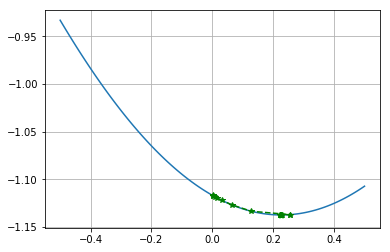

In [136]:
param=[0.18128875,0.2265978,0.2265978]
hasil=[-1.1166843897867527,-1.1364571773466592,-1.1372700718909914]

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.figure()
plt.grid()
plt.plot(thetas,E)
plt.plot(o,v,'g--*')
plt.scatter(0.2265978,-1.1372700718909914,color='lightgreen',marker='X')

Text(0,0.5,'E')

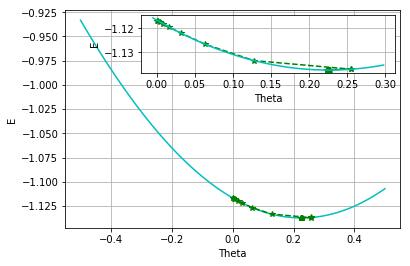

In [165]:
fig, ax = plt.subplots()
ax.plot(thetas, E,'c')
ax.plot(o, v,'g--*')
ax.grid()
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 2.5, loc=1) 
axins.plot(o, v,'g--*')
axins.plot(thetas[49:80],E[49:80],'c')
axins.grid()
ax.set_xlabel('Theta')
ax.set_ylabel('E')
axins.set_xlabel('Theta')
axins.set_ylabel('E')

In [177]:
vqe_inst1 = VQE(minimizer=minimize,minimizer_kwargs={'method': 'Powell'})

In [178]:
result_powell = vqe_inst1.vqe_run(small_ansatz, hamiltonian1, angle, None, qvm=qvm,disp=print,return_all=True)
print(result_powell)

                     models will be ineffective
	Parameters: [0.22603239] 
	E => -1.137267898588231
	Parameters: [0.22613614] 
	E => -1.1372701580525986
{'x': array(0.22613614), 'fun': array(-1.13727016), 'iteration_params': [array([0.22603239]), array([0.22613614])], 'expectation_vals': [-1.137267898588231, -1.1372701580525986]}


In [179]:
thetas = np.linspace(-0.5,0.5,100)

E_powell = [vqe_inst1.expectation(small_ansatz([param]),hamiltonian1, None ,qvm) for param in thetas]


In [181]:
param=[array([0.22603239]), array([0.22613614])]
hasil= [-1.137267898588231, -1.1372701580525986]

Text(0,0.5,'E')

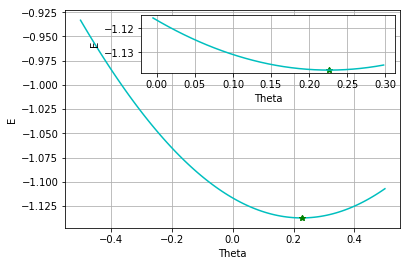

In [195]:
fig, ax = plt.subplots()
ax.plot(thetas, E_powell,'c')
ax.plot(param, hasil,'g--*')
ax.grid()
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 2.5, loc=1) 
axins.plot(param, hasil,'g--*')
axins.plot(thetas[49:80],E_powell[49:80],'c')
axins.grid()
ax.set_xlabel('Theta')
ax.set_ylabel('E')
axins.set_xlabel('Theta')
axins.set_ylabel('E')

In [192]:
vqe_inst2 = VQE(minimizer=minimize,minimizer_kwargs={'method': 'SLSQP'})

In [193]:
result_slsqp = vqe_inst2.vqe_run(small_ansatz, hamiltonian1, angle, None, qvm=qvm,disp=print,return_all=True)
print(result_slsqp)

                     models will be ineffective
	Parameters: [0.18128875] 
	E => -1.1166843897867527
	Parameters: [0.2265978] 
	E => -1.1364571773466592
	Parameters: [0.2265978] 
	E => -1.1372700718909914
{'x': array([0.2265978]), 'fun': -1.1372700718965538, 'iteration_params': [array([0.2265978]), array([0.2265978]), array([0.2265978])], 'expectation_vals': [-1.1166843897867527, -1.1364571773466592, -1.1372700718909914]}


In [198]:
thetas = np.linspace(-0.5,0.5,100)

E_slqp = [vqe_inst1.expectation(small_ansatz([param]),hamiltonian1, None ,qvm) for param in thetas]

In [199]:
param1=[array([0.2265978]), array([0.2265978]), array([0.2265978])]
hasil1=[-1.1166843897867527, -1.1364571773466592, -1.1372700718909914]

Text(0,0.5,'E')

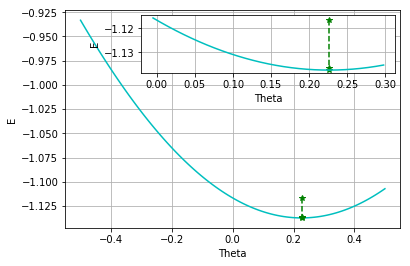

In [201]:
fig, ax = plt.subplots()
ax.plot(thetas, E_slqp,'c')
ax.plot(param1, hasil1,'g--*')
ax.grid()
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(ax, 2.5, loc=1) 
axins.plot(param1, hasil1,'g--*')
axins.plot(thetas[49:80],E_slqp[49:80],'c')
axins.grid()
ax.set_xlabel('Theta')
ax.set_ylabel('E')
axins.set_xlabel('Theta')
axins.set_ylabel('E')